In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import os
import random

In [2]:
def seed_everything(seed: int):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    # torch.manual_seed(seed)
    # torch.cuda.manual_seed(seed)
    # torch.backends.cudnn.deterministic = True
    # torch.backends.cudnn.benchmark = True
    
seed_everything(42)

In [3]:
def read_signals(filename):
    samples_count = 5000

    c = ['name', 'x', 'y']
    for i in range(0, samples_count):
        c.append(f'v{i}')
    c = c + ['cluster', 'p0', 'p1', 'p2', 'p3']
    types = {col_name: int for col_name in ['name', 'cluster', 'p0', 'p1', 'p2', 'p3']}
    types.update({col_name: np.float32 for col_name in ['x', 'y', *[f'v{i}' for i in range(0, samples_count)]]})
    
    df = pd.read_csv(filename, names=c, dtype=types)
    df = df.set_index('name', drop=True)

    return df


def write_signals(df, filename):
    df.to_csv(filename, header=False)

In [4]:
url='https://drive.google.com/file/d/15kAQDCxV8YzdvIp_6K1_eKbMPtI9z70H/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
#data = pd.read_csv(url)
data = read_signals(url)

In [5]:
data.head()

,x,y,v0,v1,v2,v3,v4,v5,v6,v7,...,v4995,v4996,v4997,v4998,v4999,cluster,p0,p1,p2,p3
name,,,,,,,,,,,,,,,,,,,,,
168,3642.316895,-107.175003,0.558,0.595,0.519,0.742,0.664,0.467,0.426,0.448,...,0.606,0.523,0.607,0.629,0.664,-1,-1,-1,-1,-1
307,4034.298096,-668.197998,0.650,0.457,0.572,0.644,0.581,0.525,0.645,0.515,...,0.397,0.579,0.636,0.570,0.530,-1,-1,-1,-1,-1
668,4358.000977,1703.198975,0.638,0.621,0.646,0.495,0.510,0.611,0.574,0.601,...,0.569,0.587,0.541,0.412,0.519,-1,-1,-1,-1,-1
229,2786.060059,75.125000,0.917,0.917,0.916,0.912,0.908,0.905,0.904,0.904,...,0.943,0.943,0.943,0.943,0.943,-1,-1,-1,-1,-1
316,988.637024,-492.056000,0.359,0.364,0.379,0.396,0.404,0.405,0.392,0.371,...,0.626,0.606,0.629,0.674,0.727,-1,-1,-1,-1,-1


In [6]:
train_df = data[data.cluster != -1]
train_df.head()

,x,y,v0,v1,v2,v3,v4,v5,v6,v7,...,v4995,v4996,v4997,v4998,v4999,cluster,p0,p1,p2,p3
name,,,,,,,,,,,,,,,,,,,,,
730,1011.065979,1100.473022,0.570,0.575,0.575,0.571,0.565,0.575,0.579,0.574,...,0.855,0.855,0.835,0.812,0.799,6,-1,1750,-1,-1
673,2520.621094,-1655.088989,0.662,0.582,0.589,0.637,0.443,0.718,0.524,0.599,...,0.500,0.508,0.535,0.538,0.408,8,0,-1,-1,-1
520,2251.706055,3314.560059,0.389,0.407,0.413,0.417,0.418,0.418,0.416,0.413,...,0.996,0.998,0.999,1.000,0.998,5,2222,-1,-1,-1
609,3748.843018,730.304993,0.756,0.765,0.781,0.793,0.804,0.811,0.819,0.833,...,0.947,0.948,0.951,0.955,0.954,1,1528,-1,4358,-1
419,4385.807129,1247.943970,0.498,0.566,0.520,0.458,0.555,0.795,0.546,0.496,...,0.529,0.550,0.626,0.550,0.584,7,-1,2414,-1,4999


In [19]:
train_df.shape

(109, 5007)

In [20]:
train_df['x'] = train_df['x'] / np.linalg.norm(train_df['x'])
train_df['y'] = train_df['y'] / np.linalg.norm(train_df['y'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
X = train_df.drop(columns=['cluster', 'p0', 'p1', 'p2', 'p3']).values
Y = train_df['cluster'].values

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [26]:
!pip install catboost
import catboost as cb

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
grid = {'learning_rate': [0.01, 0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 5, 9],
        'iterations': [50]}
cbcf = cb.CatBoostClassifier(iterations=10, learning_rate=0.01, random_seed=42, task_type="GPU", devices='0')
grid_search = cbcf.grid_search(grid, X, Y, cv=3, partition_random_seed=3, stratified=True, plot=True, )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.1820488	test: 2.1923025	best: 2.1923025 (0)	total: 101ms	remaining: 4.95s
1:	learn: 2.1655617	test: 2.1802344	best: 2.1802344 (1)	total: 190ms	remaining: 4.56s
2:	learn: 2.1423633	test: 2.1611710	best: 2.1611710 (2)	total: 254ms	remaining: 3.98s
3:	learn: 2.1226535	test: 2.1472463	best: 2.1472463 (3)	total: 309ms	remaining: 3.55s
4:	learn: 2.0987672	test: 2.1359655	best: 2.1359655 (4)	total: 362ms	remaining: 3.26s
5:	learn: 2.0797817	test: 2.1185473	best: 2.1185473 (5)	total: 410ms	remaining: 3s
6:	learn: 2.0630449	test: 2.1114325	best: 2.1114325 (6)	total: 448ms	remaining: 2.75s
7:	learn: 2.0405698	test: 2.0983571	best: 2.0983571 (7)	total: 484ms	remaining: 2.54s
8:	learn: 2.0244611	test: 2.0881585	best: 2.0881585 (8)	total: 526ms	remaining: 2.4s
9:	learn: 2.0085279	test: 2.0805723	best: 2.0805723 (9)	total: 563ms	remaining: 2.25s
10:	learn: 1.9918564	test: 2.0677686	best: 2.0677686 (10)	total: 600ms	remaining: 2.13s
11:	learn: 1.9703269	test: 2.0548311	best: 2.0548311 (11

In [ ]:
gri

In [41]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
params = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
clf = RandomForestClassifier(random_state=42)
cbcf = cb.CatBoostClassifier(iterations=10, learning_rate=0.01, random_seed=42)
clf_random = GridSearchCV(clf, params, cv=cv, verbose=2, scoring='accuracy')

In [ ]:
clf_random.fit(X, Y)

In [25]:
clf_random.best_params_, clf_random.best_score_

({'criterion': 'entropy',
  'max_depth': 5,
  'max_features': 'auto',
  'n_estimators': 100},
 0.7154654654654654)

In [26]:
best_rf = clf_random.best_estimator_

In [27]:
best_rf.predict(X) == Y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [29]:
data['x'] = data['x'] / np.linalg.norm(data['x'])
data['y'] = data['y'] / np.linalg.norm(data['y'])
data.cluster = best_rf.predict(data.drop(columns=['cluster', 'p0', 'p1', 'p2', 'p3']).values)

In [30]:
data.head()

,x,y,v0,v1,v2,v3,v4,v5,v6,v7,...,v4995,v4996,v4997,v4998,v4999,cluster,p0,p1,p2,p3
name,,,,,,,,,,,,,,,,,,,,,
168,0.046956,-0.001820,0.558,0.595,0.519,0.742,0.664,0.467,0.426,0.448,...,0.606,0.523,0.607,0.629,0.664,7,-1,-1,-1,-1
307,0.052009,-0.011346,0.650,0.457,0.572,0.644,0.581,0.525,0.645,0.515,...,0.397,0.579,0.636,0.570,0.530,7,-1,-1,-1,-1
668,0.056182,0.028921,0.638,0.621,0.646,0.495,0.510,0.611,0.574,0.601,...,0.569,0.587,0.541,0.412,0.519,7,-1,-1,-1,-1
229,0.035917,0.001276,0.917,0.917,0.916,0.912,0.908,0.905,0.904,0.904,...,0.943,0.943,0.943,0.943,0.943,1,-1,-1,-1,-1
316,0.012745,-0.008355,0.359,0.364,0.379,0.396,0.404,0.405,0.392,0.371,...,0.626,0.606,0.629,0.674,0.727,6,-1,-1,-1,-1


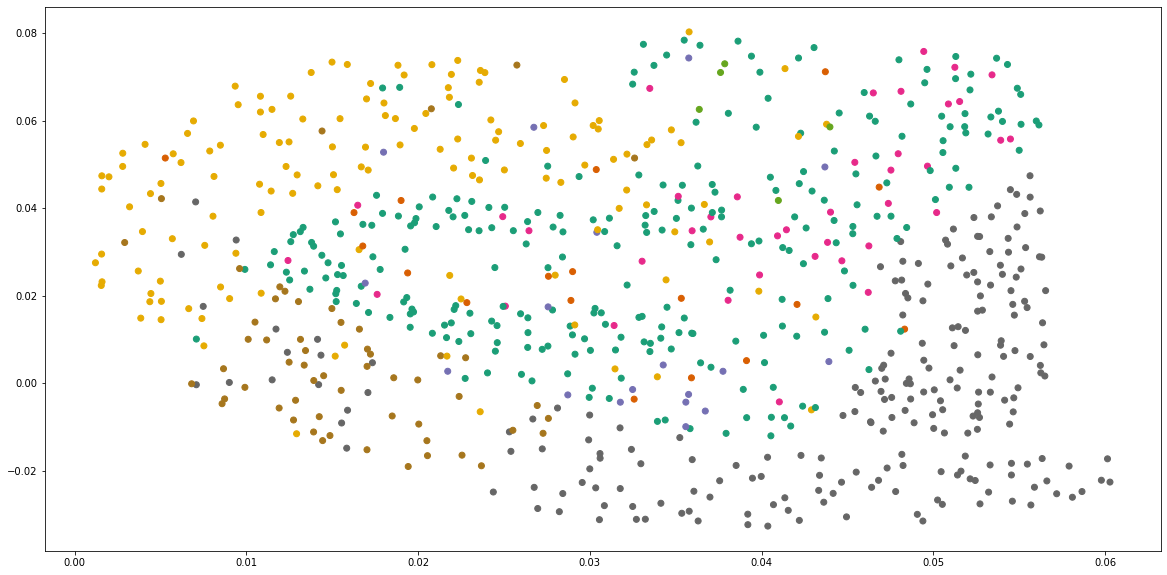

In [32]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(data.x, data.y, c=data.cluster, cmap='Dark2')
plt.show()

In [ ]:
singal_columns = [f'v{j}' for j in range(0, 5000)]
for i in range(9):
  print(i)
  for s in data[data.cluster == i].index:
    plt.plot(data.loc[s][singal_columns].values)
    plt.show()
  input()

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import ModelCheckpoint
import keras.backend as K
import keras

In [48]:
keras.optimizers.adam_v2.Adam

keras.optimizer_v2.adam.Adam

In [49]:
def create_new_model():
  model = Sequential([Input(shape=(5002, )), Dense(1000, activation='relu'), Dropout(0.25), Dense(9, activation='softmax')])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['mse', 'accuracy'])
  return model
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

In [50]:
model = create_new_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              5003000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 9)                 9009      
                                                                 
Total params: 5,012,009
Trainable params: 5,012,009
Non-trainable params: 0
_________________________________________________________________


In [65]:
fold_var = 0
VALIDATION_ACCURACY = []
VALIDATION_LOSS = []

for train_index, val_index in cv.split(X,Y):
  training_data = X[train_index]
  validation_data = X[val_index]


  model = create_new_model()


  checkpoint = ModelCheckpoint("/saved_models/"+get_model_name(fold_var), 
							monitor='val_accuracy', verbose=1, 
							save_best_only=True, mode='max')
  callbacks_list = [checkpoint]


  history = model.fit(training_data, Y[train_index],
			    epochs=200,
			    callbacks=callbacks_list,
			    validation_data=(validation_data, Y[val_index]))
  model.load_weights("/saved_models/model_"+str(fold_var)+".h5")
  results = model.evaluate(validation_data, Y[val_index])
  results = dict(zip(model.metrics_names,results))

  VALIDATION_ACCURACY.append(results['accuracy'])
  VALIDATION_LOSS.append(results['loss'])
	
  K.clear_session()
	
  fold_var += 1

Epoch 1/200
1/3 [=========>....................] - ETA: 1s - loss: 129.1813 - mse: 26.3722 - accuracy: 0.0312
Epoch 1: val_accuracy improved from -inf to 0.54545, saving model to /saved_models/model_0.h5
3/3 [==============================] - 1s 229ms/step - loss: 96.2961 - mse: 23.0826 - accuracy: 0.0805 - val_loss: 43.6717 - val_mse: 26.3584 - val_accuracy: 0.5455
Epoch 2/200
1/3 [=========>....................] - ETA: 0s - loss: 55.7801 - mse: 22.2351 - accuracy: 0.3750
Epoch 2: val_accuracy did not improve from 0.54545
3/3 [==============================] - 0s 26ms/step - loss: 55.2846 - mse: 23.0841 - accuracy: 0.3103 - val_loss: 20.5204 - val_mse: 26.3506 - val_accuracy: 0.5000
Epoch 3/200
1/3 [=========>....................] - ETA: 0s - loss: 57.2286 - mse: 23.9910 - accuracy: 0.2812
Epoch 3: val_accuracy did not improve from 0.54545
3/3 [==============================] - 0s 20ms/step - loss: 44.6476 - mse: 23.0862 - accuracy: 0.3678 - val_loss: 19.4161 - val_mse: 26.3563 - val_

In [66]:
VALIDATION_LOSS, VALIDATION_ACCURACY

([0.7307940125465393,
  0.6888276934623718,
  8.406477928161621,
  1.2403569221496582,
  0.6682522892951965],
 [0.9545454382896423,
  0.9545454382896423,
  0.8636363744735718,
  0.9545454382896423,
  0.9523809552192688])

In [73]:
model = create_new_model()
model.load_weights("/saved_models/model_1.h5")
np.argmax(model.predict(X), axis=1) == Y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [74]:

def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(9, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

In [81]:
fold_var = 0
VALIDATION_ACCURACY = []
VALIDATION_LOSS = []

for train_index, val_index in cv.split(X,Y):
  training_data = np.expand_dims(X[train_index], axis=-1)
  validation_data = np.expand_dims(X[val_index], axis=-1)


  model = make_model(training_data.shape[1:])

  model.compile(
    optimizer=keras.optimizers.adam_v2.Adam(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy", 'accuracy'])



  checkpoint = ModelCheckpoint("best_model.h5", 
							monitor='val_accuracy', verbose=1, 
							save_best_only=True, mode='max')
  callbacks_list = [checkpoint, keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1)]


  history = model.fit(training_data, Y[train_index],
			    epochs=200,
			    callbacks=callbacks_list,
			    validation_data=(validation_data, Y[val_index]))
  model.load_weights("best_model.h5")
  results = model.evaluate(validation_data, Y[val_index])
  results = dict(zip(model.metrics_names,results))

  VALIDATION_ACCURACY.append(results['accuracy'])
  VALIDATION_LOSS.append(results['loss'])
	
  K.clear_session()
	
  fold_var += 1

Epoch 1/200
2/3 [===================>..........] - ETA: 0s - loss: 2.1887 - sparse_categorical_accuracy: 0.2188 - accuracy: 0.2188
Epoch 1: val_accuracy improved from -inf to 0.27273, saving model to best_model.h5
3/3 [==============================] - 43s 21s/step - loss: 2.1900 - sparse_categorical_accuracy: 0.2069 - accuracy: 0.2069 - val_loss: 2.1833 - val_sparse_categorical_accuracy: 0.2727 - val_accuracy: 0.2727
Epoch 2/200
2/3 [===================>..........] - ETA: 0s - loss: 2.1883 - sparse_categorical_accuracy: 0.1875 - accuracy: 0.1875
Epoch 2: val_accuracy did not improve from 0.27273
3/3 [==============================] - 0s 66ms/step - loss: 2.1868 - sparse_categorical_accuracy: 0.2069 - accuracy: 0.2069 - val_loss: 2.1844 - val_sparse_categorical_accuracy: 0.2727 - val_accuracy: 0.2727
Epoch 3/200
3/3 [==============================] - ETA: 0s - loss: 2.1845 - sparse_categorical_accuracy: 0.2069 - accuracy: 0.2069
Epoch 3: val_accuracy improved from 0.27273 to 0.31818, s

KeyboardInterrupt: ignored